In [1]:
pip install deepface

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from deepface import DeepFace

In [3]:
result = DeepFace.verify(img1_path = "gambar1.jpg", img2_path = "gambar2.jpg")

In [4]:
result

{'verified': False,
 'distance': 0.6368460117832637,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [5]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

#face verification
result = DeepFace.verify(img1_path = "gambar1.jpg", img2_path = "gambar2.jpg", model_name = models[1])

In [6]:
result

{'verified': False,
 'distance': 1.0948993130566627,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [7]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
#face verification
result = DeepFace.verify(img1_path = "gambar1.jpg", img2_path = "gambar2.jpg", model_name = models[1], distance_metric = metrics[1])

In [8]:
result

{'verified': False,
 'distance': 13.430384903786816,
 'threshold': 10,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean'}

In [9]:
import cv2

In [10]:
img = cv2.imread('gambar2.jpg')

In [12]:
import matplotlib.pyplot as plt

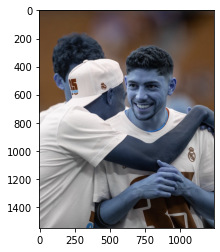

In [13]:
plt.imshow(img) # BGR

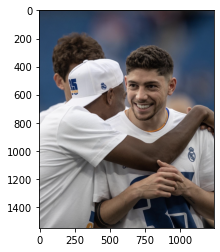

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
predictions = DeepFace.analyze(img)

age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /Users/maulaizzaazizi/.deepface/weights/age_model_weights.h5
100%|████████████████████████████████████████| 539M/539M [04:37<00:00, 1.94MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /Users/maulaizzaazizi/.deepface/weights/gender_model_weights.h5
100%|████████████████████████████████████████| 537M/537M [04:16<00:00, 2.09MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /Users/maulaizzaazizi/.deepface/weights/race_model_single_batch.h5
100%|████████████████████████████████████████| 537M/537M [04:40<00:00, 1.91MB/s]
Action: race: 100%|███████████████████████████████| 4/4 [00:04<00:00,  1.06s/it]


In [17]:
predictions

{'emotion': {'angry': 2.58787036244712e-06,
  'disgust': 3.109751497108737e-11,
  'fear': 3.252747723947458e-09,
  'happy': 99.83318448066711,
  'sad': 1.3300827994555675e-06,
  'surprise': 6.616972569872814e-06,
  'neutral': 0.16680997796356678},
 'dominant_emotion': 'happy',
 'region': {'x': 549, 'y': 403, 'w': 371, 'h': 371},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 0.10454606881188526,
  'indian': 3.089892868412391,
  'black': 0.2432883194266773,
  'white': 31.411498020708798,
  'middle eastern': 50.225496265233005,
  'latino hispanic': 14.92527098354447},
 'dominant_race': 'middle eastern'}

In [18]:
type(predictionstionsctions)

dict

In [20]:
predictions['dominant_emotion']

'happy'

## trying to draw rectangle across the face

In [31]:
# fasCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

<CascadeClassifier 0x7f7e32027bb0>

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [40]:
faces = cv2.CascadeClassifier(cv2.data.haarcascades + 
                              'haarcascade_frontalface_default.xml').detectMultiScale(gray, 1.1, 4)

In [41]:
for (x, y , w, h) in faces: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

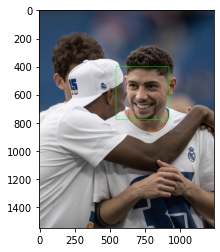

In [42]:
# let's see we got rectangle scale of this images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
predictions

{'emotion': {'angry': 2.58787036244712e-06,
  'disgust': 3.109751497108737e-11,
  'fear': 3.252747723947458e-09,
  'happy': 99.83318448066711,
  'sad': 1.3300827994555675e-06,
  'surprise': 6.616972569872814e-06,
  'neutral': 0.16680997796356678},
 'dominant_emotion': 'happy',
 'region': {'x': 549, 'y': 403, 'w': 371, 'h': 371},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 0.10454606881188526,
  'indian': 3.089892868412391,
  'black': 0.2432883194266773,
  'white': 31.411498020708798,
  'middle eastern': 50.225496265233005,
  'latino hispanic': 14.92527098354447},
 'dominant_race': 'middle eastern'}

In [47]:
# font = cv2.FONT_HERSHEY_COMPLEX
# use putText() method for inserting text on video
cv2.putText(img, 
            predictions['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4) ;

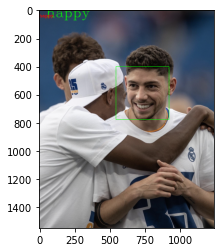

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))